# 一般化部分採点モデル

## 概要

**一般化部分得点モデル（Generalized Partial Credit Model: GPCM, [Muraki, 1992](https://doi.org/10.1002/j.2333-8504.1992.tb01436.x)）** は多値の順序尺度の反応を扱えるIRTモデル。

:::{admonition} 一般化部分得点モデル（Generalized Partial Credit Model: GPCM）

被験者 $i$、項目 $j$、カテゴリ $k = 1,\dots,K$ に対して

$$
P(y_{ij}=k)
=
\frac{
\exp\!\left(\sum_{c=1}^{k} a_j(\theta_i - b_{jc})\right)
}{
\sum_{l=0}^{K}
\exp\!\left(\sum_{c=1}^{l} a_j(\theta_i - b_{jc})\right)
}
$$

- $a_j$：項目 $j$ の識別力
- $b_{jk}$：段階 $k-1 \to k$ の困難度

:::



## GRMとGPCMの使い分けについて

:::{card} 神戸大学 分寺杏介先生の講義資料

[Chapter 8 項目反応理論 1](https://www2.kobe-u.ac.jp/~bunji/files/lecture/MVA/mva-08-item-response-theory.pdf)

> どちらを使っても本質的には違いは無いので，説明を読んでしっくり来たほうを使えば良いと思います

:::

:::{card} Cook (1996) "A comparison of three polytomous item response theory models in the context of testlet scoring"

[Cook, K. F. (1996). A comparison of three polytomous item response theory models in the context of testlet scoring. The University of Texas at Austin.](https://pubmed.ncbi.nlm.nih.gov/10063769/)

SATの実世界データとシミュレーションデータを使ってGPCMとGRMを比較した。  
$\theta$の推定値は相関係数 0.9748 ~ 0.9921と高い相関を示した。

:::


:::{card} Dai et al. (2021) "Performance of Polytomous IRT Models With Rating Scale Data"

[Dai, S., Vo, T. T., Kehinde, O. J., He, H., Xue, Y., Demir, C., & Wang, X. (2021, September). Performance of polytomous IRT models with rating scale data: An investigation over sample size, instrument length, and missing data. In Frontiers in Education (Vol. 6, p. 721963). Frontiers Media SA.](https://doi.org/10.3389/feduc.2021.721963)

- データ：Rの`irtplay`パッケージの`simdat()`関数で、GRMとGPCMの下でのデータを生成。異なるサンプルサイズ・項目数・欠損率で比較。
- GRM生成データをGPCMで分析すると収束しないケースが多い→やはり両モデルは若干異なる
- 項目母数の安定性：GPCM ＞ GRM
- 能力母数の精度：GRM ＞ GPCM（ただし高欠測率の時はGPCMが安定）
- テスト情報量はGRMが高くなる傾向がある

:::





## 考え方

### 隣のカテゴリとの2択で考える

#### 2カテゴリの場合

$y_{ij}\in\{0,1\}$とする。2PLモデルにおいては、

$$
P(y_{ij} = 1) = \frac{1}{1+ \exp[- a_j ( \theta_i - b_j)]}
, \quad
\log\left( \frac{P(y_{ij} = 1)}{1 - P(y_{ij} = 1)} \right) = a_j ( \theta_i - b_j)
$$

「$y_{ij}=0$の確率（カテゴリ0を選ぶ確率）」と「$y_{ij}=1$の確率（カテゴリ1を選ぶ確率）」の合計は1になる。そして「カテゴリ1を選ぶ確率」は

$$
P(y_{ij}=1) = \frac{P(y_{ij}=1)}{P(y_{ij}=0) + P(y_{ij}=1)}
$$

と表すことができる。

#### $K$カテゴリの場合

これを$K$カテゴリ（$k=1,2,\cdots,K$）に一般化し、「隣り合う2つのカテゴリ$k-1$と$k$の二択において$k$を選ぶ確率」$P(y_{i j}^*=k)_{k-1, k}$とする。

$$
P(y_{i j}^*=k)_{k-1, k} := \frac{P(y_{i j}=k)}{P(y_{i j}=k)+P(y_{i j}=k-1)}
\tag{1}
$$

これは反応 $y_{ij}$ が $k-1$ か $k$ のどちらかだと仮定して正規化したとき、$k$ が選ばれる「相対的な割合」。

式$(1)$を

$P(y_{ij}=k)=$の形に変形すると

$$
P(y_{ij}=k)=P(y_{ij}=k-1) \frac{P(y_{ij}^*=k)_{k-1, k}}{1-P(y_{ij}^*=k)_{k-1, k}}
\tag{2}
$$

となる。

:::{dropdown} 式変形メモ

わかりやすくするため、記号を単純化する。

$$
P\left(y_{ij}^*=k\right)_{k-1, k} = P^* =\frac{P_k}{P_k+P_{k-1}}
$$

まず

$$
P^*=\frac{P_k}{P_k+P_{k-1}}
$$

の両辺に $P_k+P_{k-1}$ を掛ける：

$$
P^*\left(P_k+P_{k-1}\right)=P_k
$$


左辺を展開：

$$
P^* P_k+P^* P_{k-1}=P_k
$$

$P_k$ を左にまとめる：

$$
\begin{aligned}
& P_k-P^* P_k=P^* P_{k-1} \\
& \left(1-P^*\right) P_k=P^* P_{k-1}
\end{aligned}
$$

両辺を $1-P^*$ で割る：

$$
P_k=P_{k-1} \frac{P^*}{1-P^*}
$$
:::

### 漸化式の形に変形

ここで、$k$と$k-1$のカテゴリの2択であるということで、2PLMと同様にロジスティックモデルで表現できるとすると、

$$
\log \frac{P(y_{i j}^*=k)_{k-1, k}}{1-P(y_{i j}^*=k)_{k-1, k}}=a_j(\theta_i-b_{j k})
$$

と対数オッズを線形モデルで表現する形に表すことができる。この両辺に指数をとると

$$
\frac{P(y_{i j}^*=k)_{k-1, k}}{1-P(y_{i j}^*=k)_{k-1, k}} = \exp[ a_j(\theta_i-b_{j k}) ]
$$

になる。簡単のため$\pi_{ijk} = a_j(\theta_i-b_{j k})$とすると、式$(2)$は

$$
\boxed{
P(y_{ij}=k)
% = P(y_{ij}=k-1) \frac{P(y_{ij}^*=k)_{k-1, k}}{1-P(y_{ij}^*=k)_{k-1, k}}
= P(y_{ij}=k-1) \exp(\pi_{ijk})
}
$$

という漸化式の形になる。言葉で書くと、「特定のカテゴリ$k$を選ぶ確率 $P(y_{ij}=k)$ 」は、「 $k-1$ を選ぶ確率 $P(y_{ij}=k-1)$ 」と「隣のカテゴリに移るオッズ$\exp(\pi_{ijk}) = \frac{P(y_{i j}^*=k)_{k-1, k}}{1-P(y_{i j}^*=k)_{k-1, k}}$ 」で表すことができるというもの。


例えば3カテゴリの場合は

$$
\begin{aligned}
P(y_{ij}=1) &= P(y_{ij}=1)\\
P(y_{ij}=2) &= P(y_{ij}=1) \exp(\pi_{ij2})\\
P(y_{ij}=3) &= \underbrace{ P(y_{ij}=1) \exp(\pi_{ij2}) }_{P(y_{ij}=2)} \exp(\pi_{ij3})\\
\end{aligned}
$$

のようになる。つまり、$P(y_{ij}=1)$に$\exp(\pi_{ijk})$の積を掛け合わせた形ですべてのカテゴリの反応確率が表される。

$$
\begin{aligned}
P(y_{ij}=k)
&= P(y_{ij}=k-1)\exp(\pi_{ijk})\\
&= P(y_{ij}=k-2)\exp(\pi_{ij,k-1})\exp(\pi_{ijk})\\
&\quad \vdots\\
&= P(y_{ij}=1)\prod_{c=2}^{k}\exp(\pi_{ijc})\\
&= P(y_{ij}=1)\exp\left(\sum_{c=2}^{k}\pi_{ijc}\right)
\end{aligned}
$$

いったん$\pi_{ij1} = 0$として、$P(y_{ij}=1) = \exp(\pi_{ij1}) = 1$ を代入すると


$$
P(y_{ij}=k) = \exp\left(\sum_{c=1}^{k}\pi_{ijc}\right)
$$

### 正規化

$P(y_{ij}=1)=1$としたため、全カテゴリの選択確率の総和が1になるとは限らない。そこで全カテゴリの総和で割って正規化する。

$$
\begin{aligned}
\frac{ P(y_{ij}=k) }{ \sum_{l=1}^K P(y_{ij}=l)}
&= \frac{ P(y_{ij}=k) }{ P(y_{ij}=1) + P(y_{ij}=2) + \cdots + P(y_{ij}=K) }\\
&= \frac{ \exp(\sum^k_{c=1} \pi_{ijc}) }{ \sum_{l=1}^K \exp(\sum^l_{c=1} \pi_{ijc}) }
\end{aligned}
$$



## 項目特性曲線

項目特性曲線（ICC）あるいは **CRC（Category Response Curves）** は 能力 $\theta$ に対して各カテゴリ $k$ が選ばれる確率 $P(Y=k\mid\theta)$ を描いた曲線群

$$
P(Y=k \mid \theta)=\frac{\exp \left(\sum_{s=1}^{k-1} a\left(\theta-b_s\right)\right)}{\sum_{t=1}^K \exp \left(\sum_{s=1}^{t-1} a\left(\theta-b_s\right)\right)}, \quad k=1, \ldots, K
$$


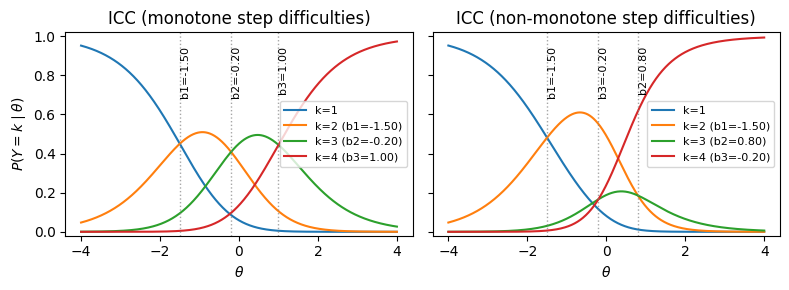

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gpcm_probs(theta, a, b_steps):
    """
    theta: shape (T,)
    a: float
    b_steps: shape (K-1,)
    returns: P shape (T, K)
    """
    theta = np.asarray(theta)
    b_steps = np.asarray(b_steps)

    K = b_steps.size + 1

    inc = a * (theta[:, None] - b_steps[None, :])  # (T, K-1)
    csum = np.cumsum(inc, axis=1)                  # (T, K-1)

    log_num = np.concatenate(
        [np.zeros((theta.size, 1)), csum],
        axis=1
    )  # (T, K)

    mx = np.max(log_num, axis=1, keepdims=True)
    exp_shift = np.exp(log_num - mx)
    P = exp_shift / np.sum(exp_shift, axis=1, keepdims=True)

    return P

# example ----------------------------------
theta = np.linspace(-4, 4, 801)
a = 1.2
K = 4

# --- ケース1：困難度が単調増加 ---
b_mono = np.array([-1.5, -0.2, 1.0])
P_mono = gpcm_probs(theta, a, b_mono)

# --- ケース2：困難度が非単調 ---
b_nonmono = np.array([-1.5, 0.8, -0.2])
P_nonmono = gpcm_probs(theta, a, b_nonmono)

fig, axes = plt.subplots(ncols=2, figsize=(8, 3), sharey=True)

# 共通設定
y_text = 0.95   # テキストの y 位置（確率スケール）
text_kwargs = dict(rotation=90, va="top", ha="left", fontsize=8)

# -----------------------------
# 左：単調増加
# -----------------------------
ax = axes[0]
for k in range(K):
    if k == 0:
        label = "k=1"
    else:
        label = f"k={k+1} (b{k}={b_mono[k-1]:.2f})"
    ax.plot(theta, P_mono[:, k], label=label)

# 縦線 + 注記（k=2..K に対応する b）
for i, b in enumerate(b_mono, start=1):
    ax.axvline(b, linestyle=":", linewidth=1, alpha=0.7, color="gray")
    ax.text(b, y_text, f"b{i}={b:.2f}", **text_kwargs)

ax.set_ylim(-0.02, 1.02)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$P(Y=k\mid\theta)$")
ax.set_title("ICC (monotone step difficulties)")
ax.legend(fontsize=8, loc="right")

# -----------------------------
# 右：非単調
# -----------------------------
ax = axes[1]
for k in range(K):
    if k == 0:
        label = "k=1"
    else:
        label = f"k={k+1} (b{k}={b_nonmono[k-1]:.2f})"
    ax.plot(theta, P_nonmono[:, k], label=label)

# 縦線 + 注記
for i, b in enumerate(b_nonmono, start=1):
    ax.axvline(b, linestyle=":", linewidth=1, alpha=0.7, color="gray")
    ax.text(b, y_text, f"b{i}={b:.2f}", **text_kwargs)

ax.set_ylim(-0.02, 1.02)
ax.set_xlabel(r"$\theta$")
ax.set_title("ICC (non-monotone step difficulties)")
ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


また、全体の傾向を見たい場合は能力 $\theta$ におけるその項目の期待得点（得点で重みづけたCRC）である **ESC（Expected Score Curve）**

$$
\mathbb{E}[Y \mid \theta]=\sum_{k=1}^K k P(Y=k \mid \theta)
$$

というものがある。

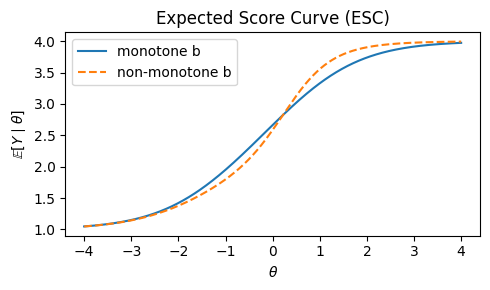

In [2]:
# ESC（単調ケース）
E_mono = np.sum((np.arange(1, K+1)[None, :]) * P_mono, axis=1)

# ESC（非単調ケース）
E_nonmono = np.sum((np.arange(1, K+1)[None, :]) * P_nonmono, axis=1)

plt.figure(figsize=(5, 3))
plt.plot(theta, E_mono, label="monotone b")
plt.plot(theta, E_nonmono, linestyle="--", label="non-monotone b")

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\mathbb{E}[Y\mid\theta]$")
plt.title("Expected Score Curve (ESC)")
plt.legend()
plt.tight_layout()
plt.show()

## 部分得点モデル

**部分得点モデル（Partial Credit Model: PCM, [Masters, 1982](https://link.springer.com/article/10.1007/BF02296272?utm_source=chatgpt.com)）** は Raschモデルを順序多値に拡張した IRT モデル。


$$
P(y_{ij}=k)
=
\frac{
\exp\!\left(\sum_{c=1}^{k}(\theta_i - b_{jc})\right)
}{
\sum_{l=0}^{K}
\exp\!\left(\sum_{c=1}^{l}(\theta_i - b_{jc})\right)
}
$$

あるいはロジットで表すと

$$
\log \frac{P(y_{ij}=k)}{P(y_{ij}=k-1)}
= \theta_i - b_{jk}
$$

PCMでは識別力パラメータは 存在しない（全部共通で$a=1$）ため扱いにくく、一般化したGPCMが提案された

## 一般化部分得点モデル

**一般化部分得点モデル（Generalized Partial Credit Model: GPCM, [Muraki, 1992](https://doi.org/10.1002/j.2333-8504.1992.tb01436.x)）** はPCMを一般化し、項目ごとに異なる識別力$a_j$を導入したモデル。


$$
P(y_{ij}=k)
=
\frac{
\exp\!\left(\sum_{c=1}^{k} a_j(\theta_i - b_{jc})\right)
}{
\sum_{l=0}^{K}
\exp\!\left(\sum_{c=1}^{l} a_j(\theta_i - b_{jc})\right)
}
$$

あるいは

$$
\log \frac{P(y_{ij}=k)}{P(y_{ij}=k-1)}
= a_j(\theta_i - b_{jk})
$$

- $a_j > 0$：項目 $j$ の識別力
- $b_{jk}$：段階 $k-1 \to k$ の難易度



## 実装

最尤推定ならRの`mirt`パッケージで`gpcm`を選ぶだけだが、ベイズモデリングはややこしい


### BUGS

[Using R and WinBUGS to fit a Generalized Partial Credit Model for developing and evaluating patient-reported outcomes assessments](https://pmc.ncbi.nlm.nih.gov/articles/PMC3926129/)

```R
1	model {
2	    for (i in 1:n) {
3	        for (j in 1:p) {
4	                Y[i, j] ~ dcat(prob[i, j, 1:K[j]])
5	                }
6	                theta[i] ~ dnorm(mu0, tau0)
7	    }
8	    for (i in 1:n) {
9	        for (j in 1:p) {
10	            for (k in 1:K[j] ) {
11	                eta[i, j, k] <- alpha[j] * (theta[i] - beta[j, k])
12	                psum[i, j, k] <- sum(eta[i, j, 1:k])
13	                exp.psum[i, j, k] <- exp(psum[i, j, k])
14	                prob[i, j, k] <- exp.psum[i, j, k] / sum(exp.psum[i, j, 1:K[j]])
15	    } } }
16	    for (j in 1:p) {
17	        alpha[j] ~ dlnorm(m.alpha, pr.alpha)
18	        beta[j, 1] <- 0.0
19	        for (k in 2:K[j]) {
20	                beta[j, k] ~ dnorm(m.beta, pr.beta)
21	        }
22	    }
23	    pr.alpha <- pow(s.alpha, −2)
24	    pr.beta <- pow(s.beta, −2)
25	mu0 ~ dnorm(0, 0.01)
26	tau0 ~ dgamma(0.5, 0.5)
27	var0 <- 1/tau0
28	}
```


### PyMC

In [3]:
# データを生成
import numpy as np
import pandas as pd

def simulate_gpcm(N=1000, J=10, K=4, seed=42):
    rng = np.random.default_rng(seed)
    theta = rng.normal(0, 1, size=N)
    a = rng.lognormal(0, 0.3, size=J)
    b = rng.normal(0, 1, size=(J, K - 1))  # step difficulties（順序制約なし）

    U = np.zeros((N, J), dtype=int)
    for j in range(J):
        inc = a[j] * (theta[:, None] - b[j][None, :])  # (N, K-1)
        csum = np.cumsum(inc, axis=1)                    # (N, K-1)
        log_num = np.concatenate([np.zeros((N, 1)), csum], axis=1)  # (N, K)
        mx = log_num.max(axis=1, keepdims=True)
        exp_shift = np.exp(log_num - mx)
        P = exp_shift / exp_shift.sum(axis=1, keepdims=True)
        for i in range(N):
            U[i, j] = rng.choice(K, p=P[i])
    return U, theta, a, b

num_users = 1000
num_items = 20
U, true_theta, true_a, true_b = simulate_gpcm(N=num_users, J=num_items)
df = pd.DataFrame(
    U,
    index=[f"user_{i+1}" for i in range(num_users)],
    columns=[f"question_{j+1}" for j in range(num_items)],
)

# 縦持ちへ変換
user_categories = [f"user_{i+1}" for i in range(num_users)]
item_categories = [f"question_{j+1}" for j in range(num_items)]

df_long = pd.melt(
    df.reset_index(), id_vars="index", var_name="item", value_name="response",
).rename(columns={"index": "user"})
df_long["user"] = pd.Categorical(df_long["user"], categories=user_categories, ordered=True)
df_long["item"] = pd.Categorical(df_long["item"], categories=item_categories, ordered=True)

df_long.head()

,user,item,response
0,user_1,question_1,0
1,user_2,question_1,0
2,user_3,question_1,3
3,user_4,question_1,2
4,user_5,question_1,0


In [4]:
import pymc as pm
import pytensor.tensor as pt

user_idx = df_long["user"].cat.codes.to_numpy()
users = df_long["user"].cat.categories.to_numpy()
item_idx = df_long["item"].cat.codes.to_numpy()
items = df_long["item"].cat.categories.to_numpy()
responses = df_long["response"].to_numpy().astype("int64")

K = int(responses.max() + 1)
n_steps = K - 1

coords = {
    "user": users,
    "item": items,
    "step": np.arange(n_steps),
    "obs_id": np.arange(len(df_long)),
}

with pm.Model(coords=coords) as model:
    user_idx_ = pm.Data("user_idx", user_idx, dims="obs_id")
    item_idx_ = pm.Data("item_idx", item_idx, dims="obs_id")
    responses_ = pm.Data("responses", responses, dims="obs_id")

    theta = pm.Normal("theta", 0, 1, dims="user")
    a = pm.LogNormal("a", 0, 0.5, dims="item")
    b = pm.Normal("b", 0, 2, dims=("item", "step"))

    # GPCM: logit_k = sum_{c=0}^{k-1} a_j (theta_i - b_{jc}),  logit_0 = 0
    inc = a[item_idx_][:, None] * (theta[user_idx_][:, None] - b[item_idx_])
    csum = pt.cumsum(inc, axis=1)
    logits = pt.concatenate([pt.zeros_like(csum[:, :1]), csum], axis=1)

    p = pt.special.softmax(logits, axis=-1)
    pm.Categorical("obs", p=p, observed=responses_, dims="obs_id")

In [5]:
%%time
with model:
    idata = pm.sample(random_seed=0, draws=1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, a, b]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 132 seconds.


CPU times: user 8.99 s, sys: 623 ms, total: 9.61 s
Wall time: 2min 19s


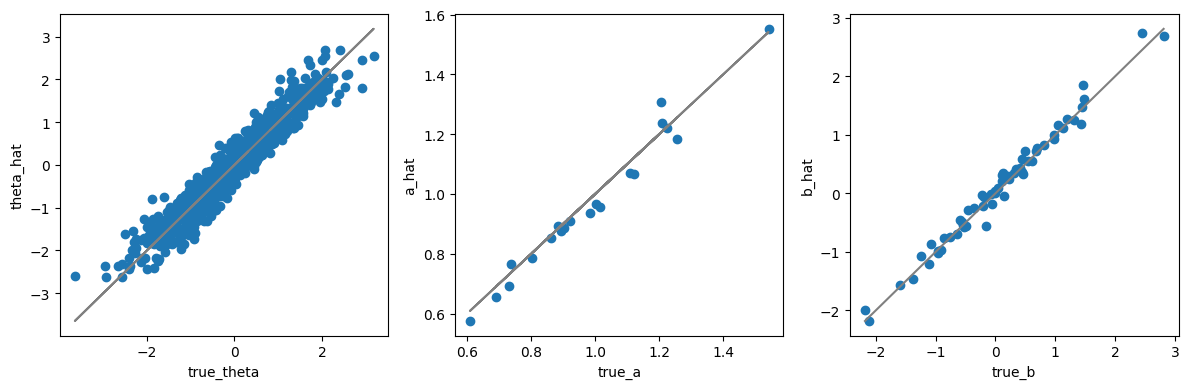

In [6]:
import matplotlib.pyplot as plt

post_mean = idata.posterior.mean(dim=["chain", "draw"])

fig, axes = plt.subplots(figsize=[12, 4], ncols=3)

ax = axes[0]
ax.scatter(true_theta, post_mean["theta"])
ax.plot(true_theta, true_theta, color="gray")
_ = ax.set(xlabel="true_theta", ylabel="theta_hat")

ax = axes[1]
ax.scatter(true_a, post_mean["a"])
ax.plot(true_a, true_a, color="gray")
_ = ax.set(xlabel="true_a", ylabel="a_hat")

ax = axes[2]
b_true = true_b.flatten()
b_hat = post_mean["b"].to_numpy().flatten()
ax.scatter(b_true, b_hat)
lims = [b_true.min(), b_true.max()]
ax.plot(lims, lims, color="gray")
_ = ax.set(xlabel="true_b", ylabel="b_hat")

plt.tight_layout()

## 参考文献

- [Masters, G. N. (1982). A Rasch model for partial credit scoring. Psychometrika, 47(2), 149-174.](https://link.springer.com/article/10.1007/BF02296272?utm_source=chatgpt.com)
- [Muraki, E. (1992). A generalized partial credit model: Application of an EM algorithm. ETS Research Report Series, 1992(1), i-30.](https://doi.org/10.1002/j.2333-8504.1992.tb01436.x)